In [18]:
from __future__ import print_function

import numpy as np

from keras.callbacks import EarlyStopping
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D
from keras.optimizers import Adam
from keras.layers.pooling import MaxPooling2D
from keras.utils import to_categorical
import tensorflow as tf
from tqdm import tqdm
import matplotlib.pyplot as plt

tf.test.gpu_device_name()

'/device:GPU:0'

In [0]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255


In [4]:
(x_train, x_valid) = x_train[5000:], x_train[:5000] 
(y_train, y_valid) = y_train[5000:], y_train[:5000]

w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

x_train shape: (55000, 28, 28, 1) y_train shape: (55000, 10)
55000 train set
5000 validation set
10000 test set


In [0]:
def create_model():
    model = Sequential()

    model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.3))

    model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.3))

    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    return model

In [0]:
def fit_model(X):
    model = create_model()
    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(lr=0.0001, decay=1e-6),
                  metrics=['accuracy'])

    history = model.fit(X,
                       y_train,
                       batch_size=64,
                       epochs=10,
                       validation_data=(x_valid, y_valid))
    return history

In [0]:
def add_noise(X, cov):
  for i, img in enumerate(X):
    X[i] = np.clip(img + np.random.normal(0.0, cov, img.shape), 0, 1.0)

In [24]:
history = []
for cov in tqdm(np.arange(0.01, 0.7, 0.2)):
  X = np.copy(x_train)
  add_noise(X, cov)
  history.append(fit_model(X))






  0%|          | 0/4 [00:00<?, ?it/s]

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 13s 228us/step - loss: 1.0561 - acc: 0.6161 - val_loss: 0.6128 - val_acc: 0.7848
Epoch 2/10
55000/55000 [==============================] - 11s 204us/step - loss: 0.6596 - acc: 0.7544 - val_loss: 0.5044 - val_acc: 0.8262
Epoch 3/10
55000/55000 [==============================] - 11s 201us/step - loss: 0.5810 - acc: 0.7856 - val_loss: 0.4598 - val_acc: 0.8432
Epoch 4/10
55000/55000 [==============================] - 11s 201us/step - loss: 0.5421 - acc: 0.8002 - val_loss: 0.4332 - val_acc: 0.8486
Epoch 5/10
55000/55000 [==============================] - 11s 199us/step - loss: 0.5117 - acc: 0.8119 - val_loss: 0.4151 - val_acc: 0.8576
Epoch 6/10
55000/55000 [==============================] - 11s 198us/step - loss: 0.4902 - acc: 0.8215 - val_loss: 0.3990 - val_acc: 0.8632
Epoch 7/10
55000/55000 [==============================] - 11s 197us/step - loss: 0.4745 - acc: 0.8271 - val_loss: 0.3






 25%|██▌       | 1/4 [01:54<05:43, 114.65s/it]

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 12s 219us/step - loss: 1.1824 - acc: 0.5659 - val_loss: 0.7250 - val_acc: 0.7290
Epoch 2/10
55000/55000 [==============================] - 11s 198us/step - loss: 0.7501 - acc: 0.7210 - val_loss: 0.5946 - val_acc: 0.7860
Epoch 3/10
55000/55000 [==============================] - 11s 198us/step - loss: 0.6720 - acc: 0.7494 - val_loss: 0.5370 - val_acc: 0.8050
Epoch 4/10
55000/55000 [==============================] - 11s 200us/step - loss: 0.6221 - acc: 0.7663 - val_loss: 0.4945 - val_acc: 0.8286
Epoch 5/10
55000/55000 [==============================] - 11s 199us/step - loss: 0.5896 - acc: 0.7782 - val_loss: 0.4683 - val_acc: 0.8368
Epoch 6/10
55000/55000 [==============================] - 11s 198us/step - loss: 0.5642 - acc: 0.7892 - val_loss: 0.4537 - val_acc: 0.8394
Epoch 7/10
55000/55000 [==============================] - 11s 198us/step - loss: 0.5467 - acc: 0.7957 - val_loss: 0.4






 50%|█████     | 2/4 [03:48<03:48, 114.33s/it]

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 12s 220us/step - loss: 1.3192 - acc: 0.5153 - val_loss: 0.7767 - val_acc: 0.7142
Epoch 2/10
55000/55000 [==============================] - 11s 202us/step - loss: 0.8428 - acc: 0.6850 - val_loss: 0.6659 - val_acc: 0.7490
Epoch 3/10
55000/55000 [==============================] - 11s 202us/step - loss: 0.7697 - acc: 0.7088 - val_loss: 0.6214 - val_acc: 0.7676
Epoch 4/10
55000/55000 [==============================] - 11s 202us/step - loss: 0.7307 - acc: 0.7223 - val_loss: 0.5830 - val_acc: 0.7870
Epoch 5/10
55000/55000 [==============================] - 11s 201us/step - loss: 0.7030 - acc: 0.7348 - val_loss: 0.5642 - val_acc: 0.7924
Epoch 6/10
55000/55000 [==============================] - 11s 200us/step - loss: 0.6797 - acc: 0.7405 - val_loss: 0.5425 - val_acc: 0.8044
Epoch 7/10
55000/55000 [==============================] - 11s 200us/step - loss: 0.6642 - acc: 0.7473 - val_loss: 0.5






 75%|███████▌  | 3/4 [05:43<01:54, 114.70s/it]

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 12s 225us/step - loss: 1.4955 - acc: 0.4506 - val_loss: 0.8590 - val_acc: 0.6736
Epoch 2/10
55000/55000 [==============================] - 11s 202us/step - loss: 0.9492 - acc: 0.6454 - val_loss: 0.7488 - val_acc: 0.7216
Epoch 3/10
55000/55000 [==============================] - 11s 199us/step - loss: 0.8776 - acc: 0.6689 - val_loss: 0.7122 - val_acc: 0.7268
Epoch 4/10
55000/55000 [==============================] - 11s 198us/step - loss: 0.8332 - acc: 0.6860 - val_loss: 0.6776 - val_acc: 0.7426
Epoch 5/10
55000/55000 [==============================] - 11s 198us/step - loss: 0.8020 - acc: 0.6950 - val_loss: 0.6482 - val_acc: 0.7512
Epoch 6/10
55000/55000 [==============================] - 11s 197us/step - loss: 0.7826 - acc: 0.7021 - val_loss: 0.6389 - val_acc: 0.7610
Epoch 7/10
55000/55000 [==============================] - 11s 198us/step - loss: 0.7649 - acc: 0.7088 - val_loss: 0.6






100%|██████████| 4/4 [07:38<00:00, 114.60s/it]






In [0]:
data = []
for h in history:
  data.append(h.history['val_loss'])


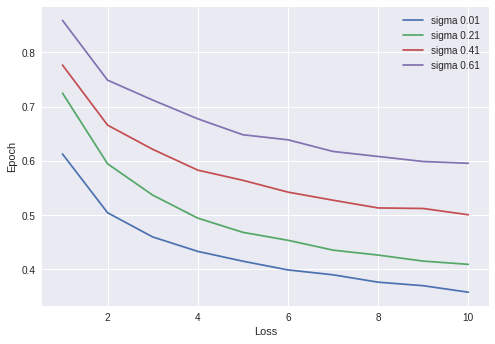

In [29]:
epoch = np.arange(1, 11, 1)
for d in data:
  plt.plot(epoch, d)

plt.xlabel('Loss')
plt.ylabel('Epoch')
plt.legend(['sigma 0.01', 'sigma 0.21', 'sigma 0.41', 'sigma 0.61'])
plt.show()